In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('sbi_dataset.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [5]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [7]:
x=df.drop('insuranceclaim',axis=1)
y=df['insuranceclaim']

In [8]:
x.shape

(1338, 7)

In [9]:
y.shape

(1338,)

In [10]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='insuranceclaim', ylabel='count'>

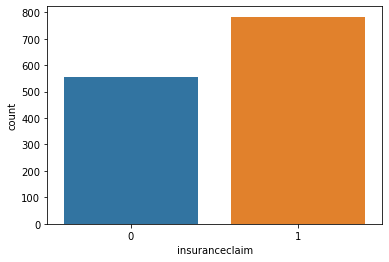

In [11]:
sns.countplot(df['insuranceclaim'])

In [31]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [14]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
st=StandardScaler()

In [17]:
x1=st.fit_transform(x)

In [18]:
#Accuracy score using x,y models,
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=45)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.808
classification report is
              precision    recall  f1-score   support

           0       0.84      0.72      0.77       141
           1       0.79      0.89      0.83       167

    accuracy                           0.81       308
   macro avg       0.81      0.80      0.80       308
weighted avg       0.81      0.81      0.81       308

confusion matrix is
[[101  40]
 [ 19 148]]




In [19]:
#Accuracy score using x_over,y_over models,
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.23,random_state=45)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.751
classification report is
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       185
           1       0.73      0.77      0.75       176

    accuracy                           0.75       361
   macro avg       0.75      0.75      0.75       361
weighted avg       0.75      0.75      0.75       361

confusion matrix is
[[135  50]
 [ 40 136]]




In [20]:
#Accuracy score using x1,y models,
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.23,random_state=45)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.899
classification report is
              precision    recall  f1-score   support

           0       0.92      0.85      0.89       141
           1       0.88      0.94      0.91       167

    accuracy                           0.90       308
   macro avg       0.90      0.90      0.90       308
weighted avg       0.90      0.90      0.90       308

confusion matrix is
[[120  21]
 [ 10 157]]




# Building the model

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.23,random_state=45)

In [22]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.3,random_state=i)
    mod=lg
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.9203980099502488 on random state 167


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.23,random_state=167)

In [24]:
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.899
classification report is
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       136
           1       0.89      0.94      0.91       172

    accuracy                           0.90       308
   macro avg       0.90      0.89      0.90       308
weighted avg       0.90      0.90      0.90       308

confusion matrix is
[[115  21]
 [ 10 162]]




In [25]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print('accuracy score through GaussianNB is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through GaussianNB is 
0.688
classification report is
              precision    recall  f1-score   support

           0       0.60      0.91      0.72       136
           1       0.88      0.51      0.65       172

    accuracy                           0.69       308
   macro avg       0.74      0.71      0.68       308
weighted avg       0.75      0.69      0.68       308

confusion matrix is
[[124  12]
 [ 84  88]]




In [26]:
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('accuracy score through svc is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through svc is 
0.922
classification report is
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       136
           1       0.93      0.94      0.93       172

    accuracy                           0.92       308
   macro avg       0.92      0.92      0.92       308
weighted avg       0.92      0.92      0.92       308

confusion matrix is
[[123  13]
 [ 11 161]]




In [28]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('accuracy score through svc is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through svc is 
0.919
classification report is
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       136
           1       0.95      0.91      0.93       172

    accuracy                           0.92       308
   macro avg       0.92      0.92      0.92       308
weighted avg       0.92      0.92      0.92       308

confusion matrix is
[[127   9]
 [ 16 156]]




In [29]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('accuracy score through Decisiob Tree Classifier is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through Decisiob Tree Classifier is 
0.984
classification report is
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       136
           1       0.98      0.99      0.99       172

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

confusion matrix is
[[133   3]
 [  2 170]]




In [33]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
add=AdaBoostClassifier()
rf=RandomForestClassifier()

In [34]:
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('accuracy score through knn is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through knn is 
0.893
classification report is
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       136
           1       0.90      0.91      0.90       172

    accuracy                           0.89       308
   macro avg       0.89      0.89      0.89       308
weighted avg       0.89      0.89      0.89       308

confusion matrix is
[[118  18]
 [ 15 157]]




In [35]:
add.fit(x_train,y_train)
pred=add.predict(x_test)
print('accuracy score through Adaboost is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through Adaboost is 
0.883
classification report is
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       136
           1       0.89      0.91      0.90       172

    accuracy                           0.88       308
   macro avg       0.88      0.88      0.88       308
weighted avg       0.88      0.88      0.88       308

confusion matrix is
[[116  20]
 [ 16 156]]




In [36]:
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('accuracy score through random forest is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through random forest is 
0.974
classification report is
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       136
           1       0.98      0.97      0.98       172

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308

confusion matrix is
[[133   3]
 [  5 167]]




# Cross Validation Score

In [37]:
models=[lg,gnb,svc,dtc,knn,add,rf]
for m in models:
    score=cross_val_score(m,x1,y,cv=5)
    print(m,'score is:')
    print(round((score.mean()),3))
    print('\n')

LogisticRegression() score is:
0.879


GaussianNB() score is:
0.709


SVC() score is:
0.902


DecisionTreeClassifier() score is:
0.978


KNeighborsClassifier() score is:
0.884


AdaBoostClassifier() score is:
0.865


RandomForestClassifier() score is:
0.954




# **The best model is Decision tree classifier**

In [38]:
grid_param={

    'criterion':['gini','entropy'],
    'max_features':['auto','sqrt','log2'],

    'splitter':['best','random']
 
    
}

gd_sr=GridSearchCV(estimator=dtc,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(x1,y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'}
0.9132902901224217


In [39]:
dtc1=DecisionTreeClassifier(criterion='gini',max_features='sqrt',splitter='best')

In [41]:
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('accuracy score through random forest is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through random forest is 
0.984
classification report is
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       136
           1       0.98      0.99      0.99       172

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

confusion matrix is
[[133   3]
 [  2 170]]




In [42]:
import joblib
joblib.dump(dtc,'sbi_insurance.obj')

['sbi_insurance.obj']